In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import numpy as np
import matplotlib.pyplot as plt
import glob

In [7]:
lst90 = glob.glob('./album/1990/'+'*')
lst00 = glob.glob('./album/2000/'+'*')
lst10 = glob.glob('./album/2010/'+'*')

In [4]:
from PIL import Image

In [8]:
imgList90 = []
for i in lst90:
    img=Image.open(i)
    imgList90.append(np.array(img)/255.)

In [13]:
len(imgList90), len(imgList00), len(imgList10)

(996, 1000, 1000)

In [11]:
imgList00 = []
for i in lst00:
    img=Image.open(i)
    imgList00.append(np.array(img)/255.)

In [12]:
imgList10 = []
for i in lst10:
    img=Image.open(i)
    imgList10.append(np.array(img)/255.)

In [15]:
imgList90[0].shape

(48, 48, 3)

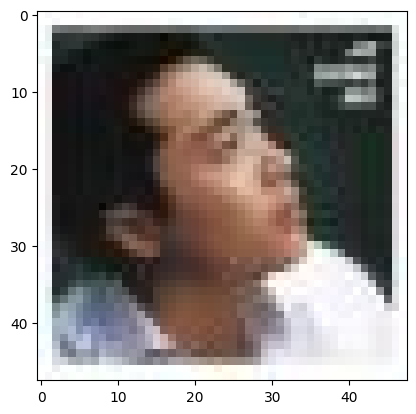

In [18]:
plt.imshow(imgList00[0])
plt.show()

In [20]:
imgList90[0][:,:,0].shape, imgList90[0][:,:,1].shape, imgList90[0][:,:,2].shape

((48, 48), (48, 48), (48, 48))

### 이미지 채널 분석

In [22]:
r_1990 = []
g_1990 = []
b_1990 = []
for i in range(48):
    r_1990.append(imgList90[i][:,:,0])
    g_1990.append(imgList90[i][:,:,1])
    b_1990.append(imgList90[i][:,:,2])

In [23]:
r_vstack = np.vstack(r_1990)
r_sample = np.array([])
for i in range(48):
    r_sample = np.append(r_sample,np.random.choice(r_vstack[:,i]))

In [24]:
g_vstack = np.vstack(g_1990)

In [25]:
g_sample = np.array([])
for i in range(48):
    g_sample = np.append(g_sample,np.random.choice(g_vstack[:,i]))

In [26]:
b_vstack = np.vstack(b_1990)
b_sample = np.array([])
for i in range(48):
    b_sample = np.append(b_sample,np.random.choice(b_vstack[:,i]))

In [30]:
# 초기화할 때 (48, 48, 3) 모양의 3차원 배열로 시작
sample1990 = np.zeros((48, 48, 3), dtype=np.float32)
lst = []
np.random.seed(45)
for k in range(48):
    r_sample = np.array([])
    g_sample = np.array([])
    b_sample = np.array([])
    
    for i in range(48):

        r_sample = np.append(r_sample, np.random.choice(r_vstack[:, i]))
        g_sample = np.append(g_sample, np.random.choice(g_vstack[:, i]))
        b_sample = np.append(b_sample, np.random.choice(b_vstack[:, i]))
    
    sample_ = np.stack([r_sample, g_sample, b_sample], axis=-1)

    
    # (k, :, :) 위치에 데이터 추가
    sample1990[k, :, :] = sample_

In [28]:
sample1990.shape

(48, 48, 3)

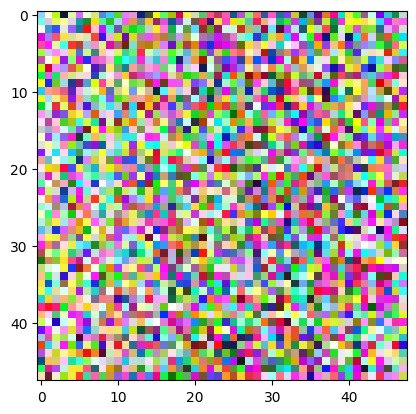

In [29]:
plt.imshow(sample1990)

In [58]:
# 시드 설정
np.random.seed(45)

# 30개의 (48, 48, 3) 배열을 담을 리스트를 초기화합니다.
sample1990_list = []

for _ in range(300):
    # (48, 48, 3) 모양의 3차원 배열로 초기화합니다.
    sample1990 = np.zeros((48, 48, 3), dtype=np.float32)

    for k in range(48):
        r_sample = np.array([])
        g_sample = np.array([])
        b_sample = np.array([])

        for i in range(48):
            r_sample = np.append(r_sample, np.random.choice(r_vstack[:, i]))
            g_sample = np.append(g_sample, np.random.choice(g_vstack[:, i]))
            b_sample = np.append(b_sample, np.random.choice(b_vstack[:, i]))

        sample_ = np.stack([r_sample, g_sample, b_sample], axis=-1)

        # (k, :, :) 위치에 데이터 추가
        sample1990[k, :, :] = sample_

    # sample1990를 리스트에 추가 (복제)
    sample1990_list.append(sample1990.copy())

# sample1990_list에는 30개의 독립적인 (48, 48, 3) 배열이 담겨집니다.

In [59]:
sample1990_list[0].shape

(48, 48, 3)

### 이미지의 rgb값의 분포를 분석해서 새로운 이미지를 만들 수 있을까? 검증

In [60]:
combined_array = np.stack(sample1990_list, axis=0)
combined_array

array([[[[0.58431375, 0.8235294 , 0.99215686],
         [0.99215686, 0.99607843, 0.8627451 ],
         [0.7137255 , 0.9843137 , 0.07843138],
         ...,
         [0.2       , 0.78039217, 0.8392157 ],
         [0.07843138, 0.5529412 , 0.29803923],
         [0.7490196 , 0.8627451 , 0.83137256]],

        [[0.4392157 , 1.        , 0.9019608 ],
         [0.88235295, 0.75686276, 0.88235295],
         [0.8980392 , 0.9764706 , 0.31764707],
         ...,
         [0.827451  , 0.09803922, 1.        ],
         [0.972549  , 0.49019608, 0.7372549 ],
         [0.99607843, 0.35686275, 0.96862745]],

        [[1.        , 1.        , 0.95686275],
         [0.21568628, 0.59607846, 0.8039216 ],
         [0.22745098, 0.30588236, 0.96862745],
         ...,
         [0.8745098 , 0.6666667 , 0.98039216],
         [0.8666667 , 0.32941177, 0.84313726],
         [0.8509804 , 0.8627451 , 0.80784315]],

        ...,

        [[0.00784314, 0.32941177, 0.4862745 ],
         [0.972549  , 0.73333335, 0.3647059 ]

In [61]:
combined_array.shape

(300, 48, 48, 3)

#### 평균

In [62]:
mean_90=np.mean(combined_array, axis=0)

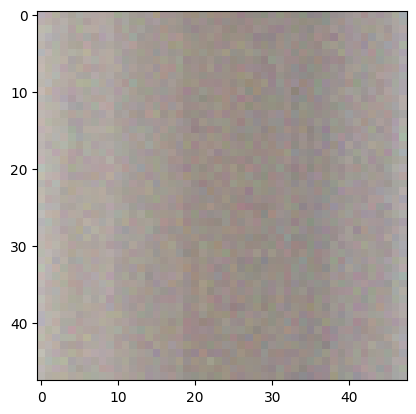

In [63]:
plt.imshow(mean_90)
plt.show()

#### 최빈값

In [68]:
mode_array = stats.mode(combined_array, axis=0)

In [75]:
mode_array = mode_array.mode.reshape(48,48,3)

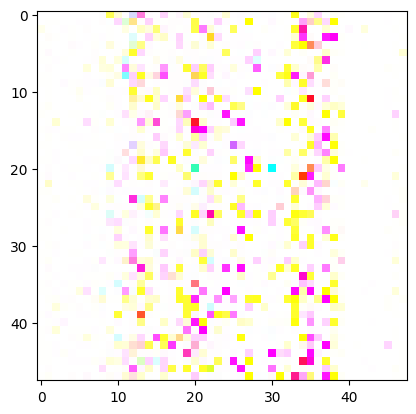

In [76]:
plt.imshow(mode_array)
plt.show()

#### 중앙값

In [77]:
median_array = np.median(combined_array, axis=0)

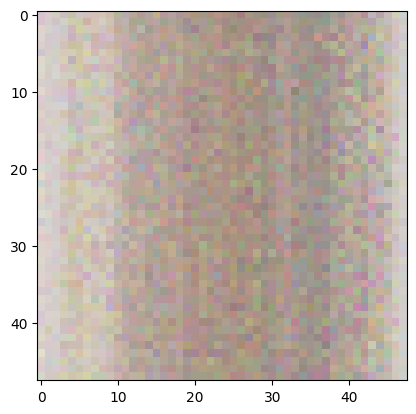

In [78]:
plt.imshow(median_array)
plt.show()

이미지 생성 안될것 같음, 딥러닝기법 필요해보임